In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import RocCurveDisplay

In [243]:
data = pd.read_csv('Credit.csv')

In [244]:
le = LabelEncoder()
data['approval'] = le.fit_transform(data.approval.values)
data['job'] = le.fit_transform(data.job.values)
data['marital'] = le.fit_transform(data.marital.values)
data['education'] = le.fit_transform(data.education.values)
data['housing'] = le.fit_transform(data.housing.values)

In [245]:
x = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0,1,2,3,4,5,6,7,8
0,0.149780,0.833333,0.333333,0.00,0.068455,0.0,0.000037,0.000000,0.0
1,0.156388,0.583333,0.333333,0.25,0.108750,0.5,0.000043,0.000000,0.0
2,0.160793,0.333333,0.666667,0.50,0.062590,0.5,0.000041,0.000000,0.0
3,0.149780,0.333333,0.333333,0.50,0.064281,0.5,0.000042,0.061224,0.0
4,0.213656,0.083333,0.333333,0.25,0.044469,0.5,0.000043,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
4516,0.301762,0.583333,0.333333,0.25,0.039999,0.5,0.000047,0.081633,0.0
4517,0.209251,0.500000,0.333333,0.50,0.000000,0.5,0.000027,0.000000,0.0
4518,0.209251,0.750000,0.333333,0.25,0.048429,0.0,0.000040,0.204082,0.0
4519,0.145374,0.083333,0.333333,0.25,0.059731,0.0,0.000039,0.061224,0.0


In [246]:
df = df.dropna()

<AxesSubplot:>

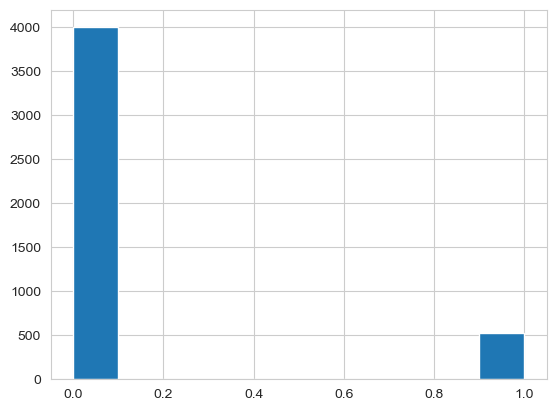

In [293]:
df.iloc[:, -1].hist()

In [247]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:-1],
                                                   df.iloc[:,-1],
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   stratify=df.iloc[:,-1],
                                                   random_state=128)

In [248]:
svm1 = SVC()

In [249]:
svm1.fit(X_train, y_train)

SVC()

In [250]:
y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)

In [251]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy: {}".format(accuracy_score(y_test, y_test_pred)))
print("Recall: {}".format(recall_score(y_test, y_test_pred, average='weighted')))
print("Precision: {}".format(precision_score(y_test, y_test_pred, average='weighted')))
print("f1: {}".format(f1_score(y_test, y_test_pred, average='weighted')))

Accuracy: 0.8849557522123894
Recall: 0.8849557522123894
Precision: 0.7831466833737959
f1: 0.830944368274544


C:\Users\shars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 25.52222222222222, 'New label')

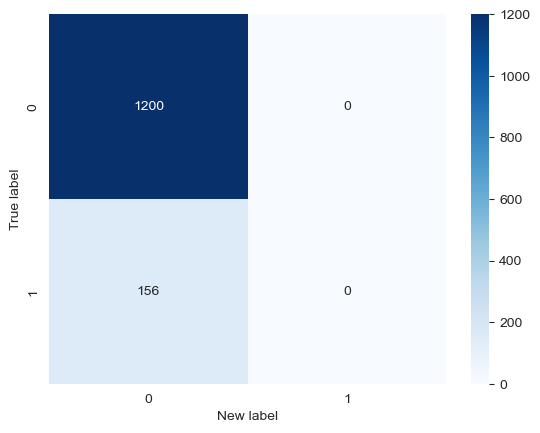

In [252]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel("New label")

# Балансировка

In [253]:
from sklearn.manifold import TSNE

In [254]:
tsne = TSNE(init='random', perplexity=10).fit_transform(df.iloc[:,1:-1])

C:\Users\shars\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [255]:
df_print = pd.DataFrame()
df_print['y'] = df.iloc[:,-1]
df_print['comp-1'] = tsne[:,0]
df_print['comp-2'] = tsne[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

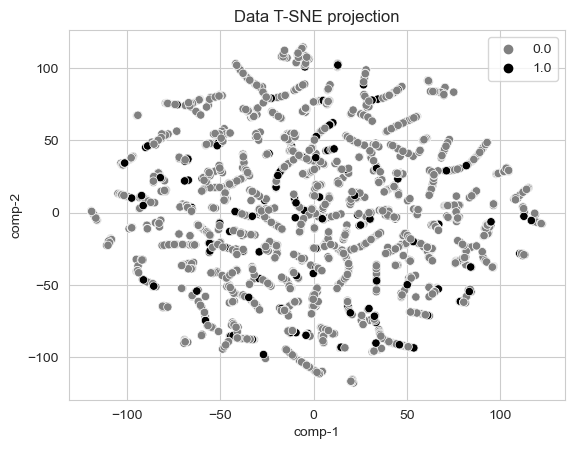

In [256]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_print.y.tolist(),
                palette=sns.color_palette(palette=["#808080", "#000000"]),
                data=df_print).set(title="Data T-SNE projection")

## Увеличение выборки

In [257]:
smote = SMOTE()

In [258]:
df_x = df.iloc[:,1:-1]
df_y = df.iloc[:,-1]
df_x, df_y = smote.fit_resample(df_x, df_y)
df_smote = pd.concat([df_x, df_y], axis=1)

In [259]:
tsne = TSNE(init='random', perplexity=10).fit_transform(df_x)

C:\Users\shars\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [260]:
df_print = pd.DataFrame()
df_print['y'] = df_y
df_print['comp-1'] = tsne[:,0]
df_print['comp-2'] = tsne[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

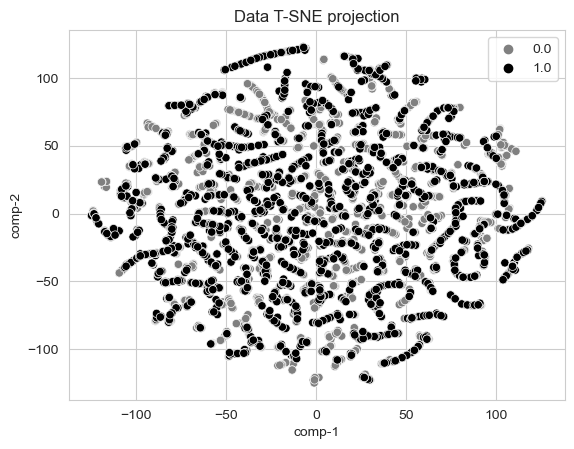

In [261]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_print.y.tolist(),
                palette=sns.color_palette(palette=["#808080", "#000000"]),
                data=df_print).set(title="Data T-SNE projection")

In [262]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    df_x,
    df_y,
    test_size=0.3,
    shuffle=True,
    stratify=df_y,
    random_state=128)

In [263]:
svm2 = SVC()

In [264]:
svm2.fit(X_train_smote, y_train_smote)

SVC()

In [265]:
y_train_smote_pred = svm2.predict(X_train_smote)
y_test_smote_pred = svm2.predict(X_test_smote)

In [266]:
print("Accuracy: {}".format(accuracy_score(y_test_smote, y_test_smote_pred)))
print("Recall: {}".format(recall_score(y_test_smote, y_test_smote_pred, average='weighted')))
print("Precision: {}".format(precision_score(y_test_smote, y_test_smote_pred, average='weighted')))
print("f1: {}".format(f1_score(y_test_smote, y_test_smote_pred, average='weighted')))

Accuracy: 0.6256773655689871
Recall: 0.6256773655689871
Precision: 0.6299176698096326
f1: 0.622632416151968


Text(0.5, 25.52222222222222, 'New label')

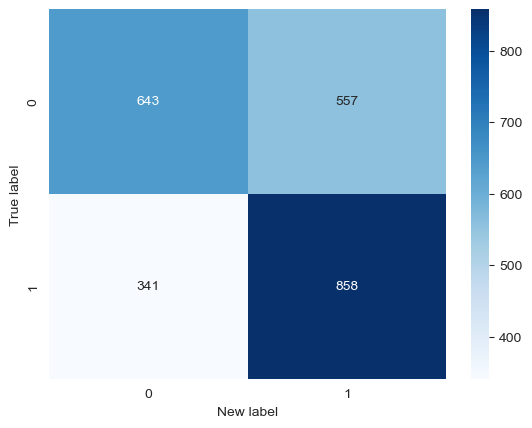

In [267]:
cm = confusion_matrix(y_test_smote, y_test_smote_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel("New label")

## Уменьшение выборки

In [268]:
from imblearn.under_sampling import RandomUnderSampler

In [269]:
rus = RandomUnderSampler(random_state=128)
df_x_rus, df_y_rus = rus.fit_resample(df.iloc[:,1:-1], df.iloc[:,-1])

In [308]:
df_y_rus.tolist().count(0)

520

In [270]:
tsne = TSNE(init='random', perplexity=10).fit_transform(df_x_rus)

C:\Users\shars\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [271]:
df_print = pd.DataFrame()
df_print['y'] = df_y_rus
df_print['comp-1'] = tsne[:,0]
df_print['comp-2'] = tsne[:,1]

[Text(0.5, 1.0, 'Data T-SNE projection')]

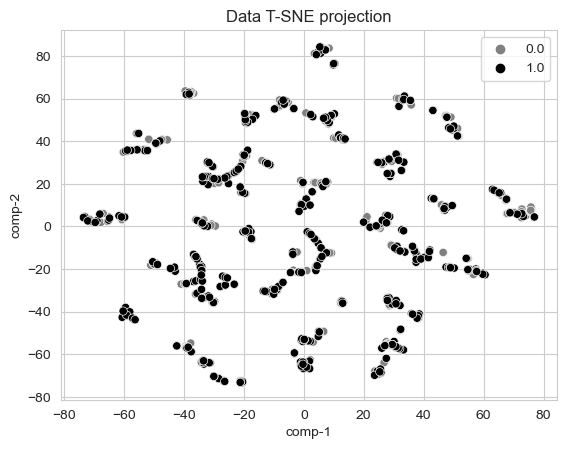

In [272]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df_print.y.tolist(),
                palette=sns.color_palette(palette=["#808080", "#000000"]),
                data=df_print).set(title="Data T-SNE projection")

In [273]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(
    df_x_rus,
    df_y_rus,
    test_size=0.3,
    shuffle=True,
    stratify=df_y_rus,
    random_state=128)

In [274]:
svm3 = SVC()

In [275]:
svm3.fit(X_train_rus, y_train_rus)

SVC()

In [276]:
y_train_rus_pred = svm3.predict(X_train_rus)
y_test_rus_pred = svm3.predict(X_test_rus)

In [277]:
print("Accuracy: {}".format(accuracy_score(y_test_rus, y_test_rus_pred)))
print("Recall: {}".format(recall_score(y_test_rus, y_test_rus_pred, average='weighted')))
print("Precision: {}".format(precision_score(y_test_rus, y_test_rus_pred, average='weighted')))
print("f1: {}".format(f1_score(y_test_rus, y_test_rus_pred, average='weighted')))

Accuracy: 0.5673076923076923
Recall: 0.5673076923076923
Precision: 0.5673769075727036
f1: 0.5671965392163916


Text(0.5, 25.52222222222222, 'New label')

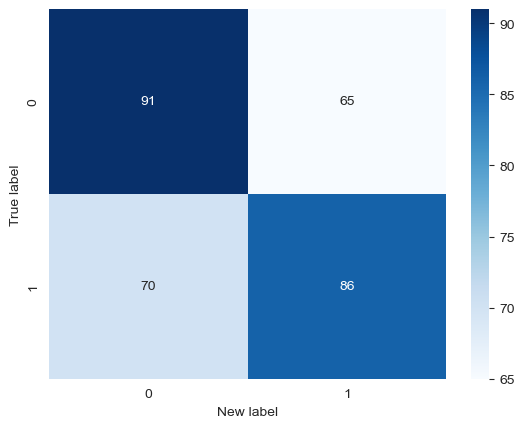

In [278]:
cm = confusion_matrix(y_test_rus, y_test_rus_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel("New label")

## Взвешивание классов

In [279]:
from sklearn.utils.class_weight import compute_class_weight

In [280]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

In [309]:
print(class_weights)

[0.56506972 4.34203297]


In [281]:
weights = []
for i in y_train:
    if i == 0:
        weights.append(class_weights[0])
    else:
        weights.append(class_weights[1])

In [282]:
svm4 = SVC()

In [283]:
svm4.fit(X_train, y_train, sample_weight=weights)

SVC()

In [284]:
y_train_weights_pred = svm4.predict(X_train)
y_test_weights_pred = svm4.predict(X_test)

In [285]:
print("Accuracy: {}".format(accuracy_score(y_test, y_test_weights_pred)))
print("Recall: {}".format(recall_score(y_test, y_test_weights_pred, average='weighted')))
print("Precision: {}".format(precision_score(y_test, y_test_weights_pred, average='weighted')))
print("f1: {}".format(f1_score(y_test, y_test_weights_pred, average='weighted')))

Accuracy: 0.5870206489675516
Recall: 0.5870206489675516
Precision: 0.8237863079938219
f1: 0.6616842317407277


Text(0.5, 25.52222222222222, 'New label')

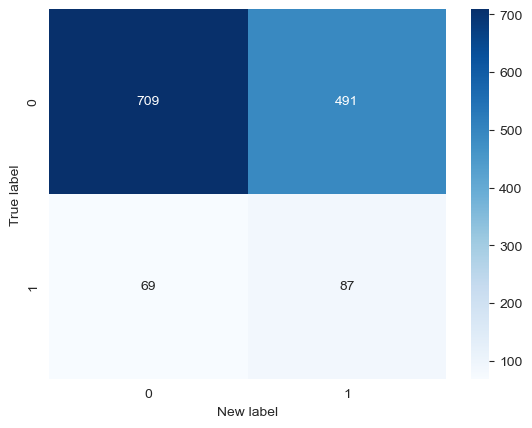

In [286]:
cm = confusion_matrix(y_test, y_test_weights_pred)
sns.heatmap(cm, cmap='Blues', annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel("New label")

# Результаты

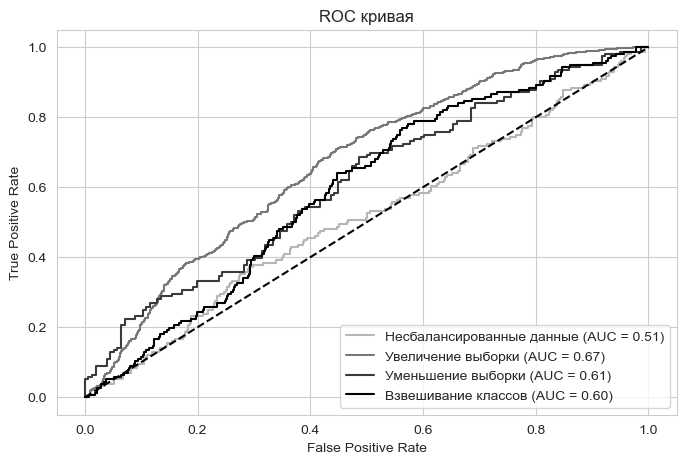

In [298]:
fig, ax = plt.subplots(figsize=[8, 5])
RocCurveDisplay.from_estimator(svm1, X_test, y_test, ax=ax, name="Несбалансированные данные", color="#B6B6B6")
RocCurveDisplay.from_estimator(svm2, X_test_smote, y_test_smote, ax=ax, name="Увеличение выборки", color="#777777")
RocCurveDisplay.from_estimator(svm3, X_test_rus, y_test_rus, ax=ax, name="Уменьшение выборки", color="#3B3B3B")
RocCurveDisplay.from_estimator(svm4, X_test, y_test, ax=ax, name="Взвешивание классов", color="#000000")
ax.set_title("ROC кривая")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot([0, 1], [0, 1], "k--")

In [299]:
from sklearn.metrics import PrecisionRecallDisplay

Text(0, 0.5, 'Precision')

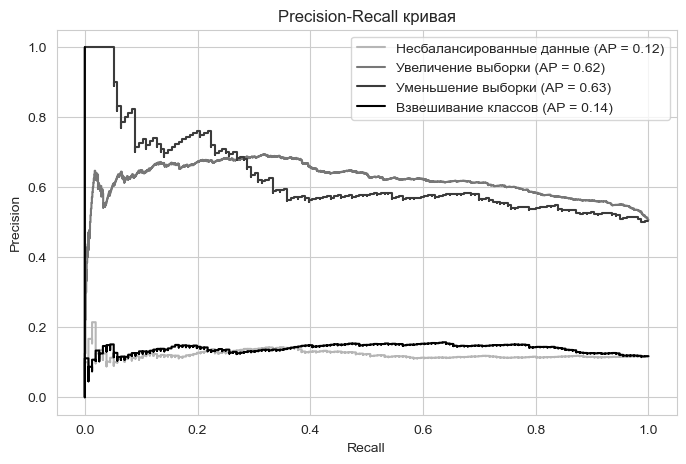

In [303]:
fig, ax = plt.subplots(figsize=[8, 5])
PrecisionRecallDisplay.from_estimator(svm1, X_test, y_test, ax=ax, name="Несбалансированные данные", color="#B6B6B6")
PrecisionRecallDisplay.from_estimator(svm2, X_test_smote, y_test_smote, ax=ax, name="Увеличение выборки", color="#777777")
PrecisionRecallDisplay.from_estimator(svm3, X_test_rus, y_test_rus, ax=ax, name="Уменьшение выборки", color="#3B3B3B")
PrecisionRecallDisplay.from_estimator(svm4, X_test, y_test, ax=ax, name="Взвешивание классов", color="#000000")
ax.set_title("Precision-Recall кривая")
plt.legend(loc="upper right")
plt.xlabel("Recall")
plt.ylabel("Precision")